In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import entropy
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr
from copy import deepcopy

import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
warnings.filterwarnings('ignore')

img = 'plots/figure_{}.png'
dataFolder = '../../data/{}'

In [24]:
df = pd.read_csv(dataFolder.format('customer_behavior_normalized.csv'))
df = df.set_index('CustomerID')

In [25]:
df

,Mean Days Purchase,Min Days Purchase,Max Days Purchase,Max Products In Basket,Min Products In Basket,Mean Products In Basket,Qta Q1,Amount Q1,Qta Q2,Amount Q2,Qta Q3,Amount Q3,Distinct Products,Distinct Baskets,Total Products,Behavior Entropy
CustomerID,,,,,,,,,,,,,,,,
12347,0.239703,0.090517,0.379310,0.128205,0.015385,0.067399,0.041210,0.052482,0.044035,0.042935,0.018108,0.016638,0.066667,0.032967,0.038244,1.298053
12349,1.000000,1.000000,1.000000,0.174359,0.174359,0.174359,0.000000,0.000000,0.000000,0.000000,0.020606,0.021305,0.034872,0.000000,0.013641,0.964377
12350,1.000000,1.000000,1.000000,0.071795,0.071795,0.071795,0.027252,0.022733,0.000000,0.000000,0.000000,0.000000,0.014359,0.000000,0.007113,0.757002
12352,0.121408,0.005747,0.287356,0.035897,0.000000,0.022711,0.041542,0.042280,0.000000,0.000000,0.010303,0.012178,0.030769,0.032967,0.015189,1.113500
12353,1.000000,1.000000,1.000000,0.005128,0.005128,0.005128,0.000000,0.000000,0.002635,0.003366,0.000000,0.000000,0.001026,0.000000,0.000502,0.390138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,1.000000,1.000000,1.000000,0.025641,0.025641,0.025641,0.000000,0.000000,0.004893,0.009270,0.000000,0.000000,0.005128,0.000000,0.001339,0.530647
18281,1.000000,1.000000,1.000000,0.005128,0.005128,0.005128,0.000000,0.000000,0.000000,0.000000,0.002498,0.003120,0.001026,0.000000,0.000586,0.400498
18282,0.120690,0.120690,0.120690,0.005128,0.005128,0.005128,0.001329,0.003075,0.001129,0.002033,0.000000,0.000000,0.003077,0.005495,0.000962,0.966659


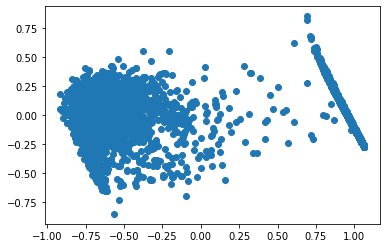

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns= ['principal component 1', 'principal component 2'])

from matplotlib import pyplot
pyplot.scatter(principalDf['principal component 1'], principalDf['principal component 2'])